<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Synthetic_Data_Autoregressive_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

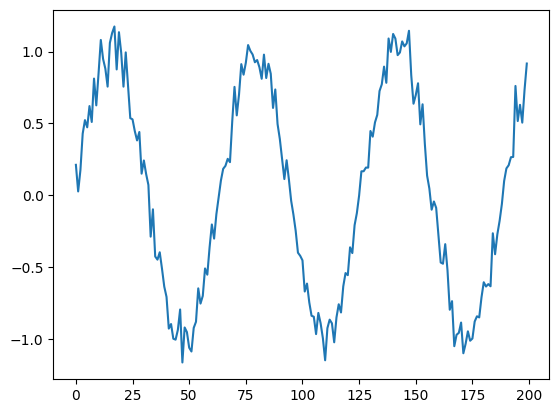

In [24]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [25]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X shape", X.shape, "Y.shape", Y.shape)

X shape (190, 10) Y.shape (190,)


In [26]:
#Autoregressive Linear Model
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate = 0.1)
)

# Training the first half of the data
# Testing as validation the second half
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:])
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 1.4116 - val_loss: 1.0850
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.1435 - val_loss: 0.6429
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4644 - val_loss: 0.3279
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3202 - val_loss: 0.1833
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1411 - val_loss: 0.0681
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0609 - val_loss: 0.1087
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0881 - val_loss: 0.0409
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0489 - val_loss: 0.1090
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0936 - val_loss: 0.1084
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0678 - val_loss: 0.0745
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0833 - val_loss: 0.0600
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0524 - val_loss: 0.0314
E

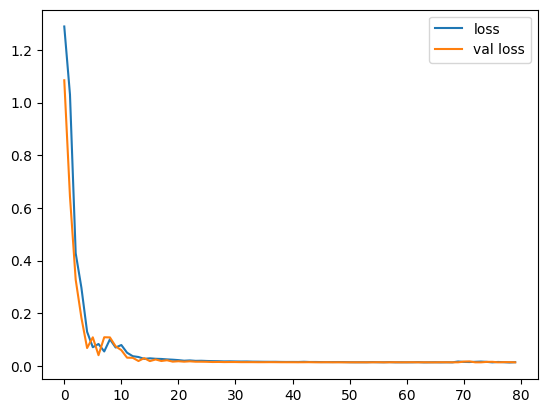

In [27]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

In [28]:
#Forecasting future values
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

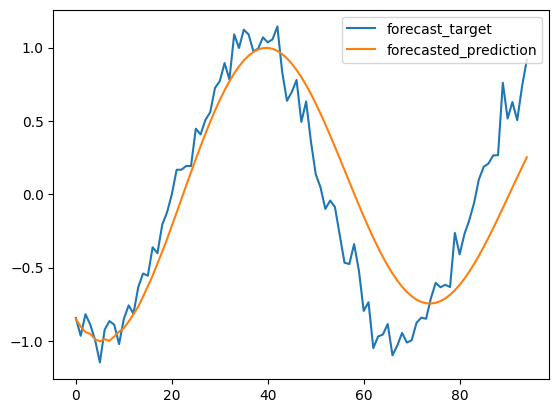

In [29]:
plt.plot(validation_target, label = "forecast_target")
plt.plot(validation_predictions, label = "forecasted_prediction")
plt.legend()
plt.show()